In [1]:
#importer les bibliothèques:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Etape de Préparation de la base de données:**

In [2]:
import re
import pandas as pd

# Ajoutons les en-têtes (noms de colonnes) à nos données :
data_file_path = '/content/welddb.data'
headers_file_path = '/content/welddb.tex'

headers = []

with open(headers_file_path, 'r') as f:
    for line in f:
        line = line.strip()

        # On ne garde que les lignes contenant "\item{} \indent"
        if line.startswith(r'\item{} \indent'):
            # On enlève le LaTeX (\item{} \indent)
            clean_line = re.sub(r'\\item\{\}\s*\\indent\s*', '', line)

            # On sépare la partie avant et après le "/"
            parts = clean_line.split('/')
            if len(parts) == 2:
                name = parts[0].strip()
                unit = parts[1].strip()
                # On combine les deux avec parenthèses
                header_name = f"{name} ({unit})"
            else:
                # Si pas de "/", on garde simplement le texte
                header_name = clean_line.strip()

            headers.append(header_name)

# Vérifions le résultat
print("Nombre de colonnes extraites :", len(headers))
print("Exemples de colonnes :", headers[:10])

# Lecture du fichier de données
df = pd.read_csv(data_file_path, sep=r'\s+', header=None, names=headers)


Nombre de colonnes extraites : 44
Exemples de colonnes : ['Carbon concentration (weight \\%)', 'Silicon concentration (weight \\%)', 'Manganese concentration (weight \\%)', 'Sulphur concentration (weight \\%)', 'Phosphorus concentration (weight \\%)', 'Nickel concentration (weight \\%)', 'Chromium concentration (weight \\%)', 'Molybdenum concentration (weight \\%)', 'Vanadium concentration (weight \\%)', 'Copper concentration (weight \\%)']


In [3]:
df


,Carbon concentration (weight \%),Silicon concentration (weight \%),Manganese concentration (weight \%),Sulphur concentration (weight \%),Phosphorus concentration (weight \%),Nickel concentration (weight \%),Chromium concentration (weight \%),Molybdenum concentration (weight \%),Vanadium concentration (weight \%),Copper concentration (weight \%),...,Charpy temperature ($^{\circ}$C),Charpy impace toughness (J),Hardness (kg mm$^{-2}$),50 \% FATT,Primary ferrite in microstructure (\%),Ferrite with second phase (\%),Acicular ferrite (\%),Martensite (\%),Ferrite with carbide aggreagate (\%),Weld ID
0,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-28,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-38,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,-48,100,N,N,32,28,40,0,0,Evans-Ni/CMn-1990/1991-0Bawch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,0.100,0.35,0.90,0.008,0.016,0.60,8.6,0.98,0.18,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX35
1648,0.088,0.36,0.88,0.008,0.017,0.57,8.4,0.94,0.19,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX36
1649,0.090,0.34,0.89,0.008,0.016,0.17,8.2,0.94,0.02,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX37
1650,0.092,0.35,0.90,0.008,0.016,0.54,8.4,0.97,0.17,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX38


In [4]:
# Sauvegarder le DataFrame en fichier Excel
output_file = '/content/welddb.xlsx'
df.to_excel(output_file, index=False)

print("✅ Fichier Excel créé avec succès :", output_file)


✅ Fichier Excel créé avec succès : /content/welddb.xlsx


**Extraction et analyse des sources à partir de la colonne "Weld ID"**

En analysant la colonne "Weld ID", on remarque que chaque identifiant de soudure contient plusieurs informations, comme le nom du chercheur ou du laboratoire, le type de matériau, l’année ou encore le numéro du test. Le code a pour but d’extraire uniquement la source principale (par exemple le nom du chercheur ou du laboratoire) à partir de ces identifiants complexes. Pour cela, il découpe les chaînes de caractères selon les symboles /, - et +, afin de ne conserver que la partie la plus significative. Cette extraction est essentielle car elle permet de regrouper les soudures selon leur origine, de comparer les résultats entre différentes sources et d’analyser l’influence de chaque laboratoire sur les caractéristiques des soudures. En simplifiant ainsi les identifiants, on facilite grandement les analyses statistiques et la visualisation des données.

In [5]:
# Identifier les différentes sources de soudures présentes dans le jeu de données

sources_brutes = []
for weld_id in df['Weld ID'].unique():
    if weld_id.split('/')[0] not in sources_brutes:
        sources_brutes.append(weld_id.split('/')[0])

sources_nettoyees_1 = []
for src in sources_brutes:
    if src.split('-')[0] not in sources_nettoyees_1:
        try:
            sources_nettoyees_1.append(src.split('-')[0].concat(i.split('-')[1]))  # concat remplacé par +
        except:
            sources_nettoyees_1.append(src.split('-')[0])

sources_finales = []
for src in sources_nettoyees_1:
    if src.split('+')[0] not in sources_finales:
        sources_finales.append(src.split('+')[0])

sources_finales



['Evans',
 'Es',
 'KocakPEv',
 'KocakPREv',
 'SurianEtAl',
 'Alekseev&',
 'RaiterGonzal',
 'SvenGret',
 'PakSven',
 'JorgeEtAl',
 'Hunt&',
 'Kluket',
 'Cunh',
 'Pat',
 'Wats',
 'EvHtIp1979',
 'Stil',
 'Gar&K',
 'Ga&K',
 'PantK',
 'EPRI',
 'Chandel&',
 'Icici&',
 'Blond&',
 'Natsume',
 'Mart',
 'Sw&Rog',
 'Kik',
 'Wolst',
 'Ditt',
 'Inag&',
 'p9',
 'p10',
 'p11',
 'p12',
 'p13',
 'p14',
 'p15',
 'p16',
 'p21',
 'p22',
 'p23',
 'p24',
 'p25',
 'RC81033',
 'p26',
 'p28',
 'p29',
 'p30',
 'p31',
 'p32',
 'p33',
 'p34',
 'p35',
 'p36',
 'EvansLetter',
 'EvansLetterCo',
 'EvansLetterC',
 'Birmingham']

In [6]:
len(sources_finales)

59

Après nettoyage et extraction des informations à partir de la colonne "Weld ID", nous avons identifié 59 sources de soudures différentes. Chaque source correspond à un chercheur ou à un laboratoire à l’origine des données expérimentales. Cette identification permet de regrouper les soudures par origine et de faciliter l’analyse comparative entre les différentes sources du jeu de données.

In [7]:
df.dtypes.value_counts()

,count
object,40
float64,4


On déduit que 40 colonnes sont de type ***object*** donc elles contiennent des valeurs  non numérique , alors que 4 sont de type ***float*** donc contiennent des valeurs numériques

In [8]:
# Conversion des colonnes en valeurs numériques si possible

def convert_to_numeric(column):
    try:
        return pd.to_numeric(column)
    except ValueError:
        return column  # If conversion fails, return the original columnz

df = df.apply(convert_to_numeric)


In [9]:
df.dtypes.value_counts()

,count
object,40
float64,4


Le résultat montre que le nombre de colonnes numériques et catégoriques n’a pas changé après la tentative de conversion. Cela signifie que la plupart des colonnes contiennent encore des caractères non numériques (comme des symboles ou du texte), empêchant leur transformation en valeurs numériques.

In [10]:
#Remplacement du symbole N par Nan
df.replace('N', np.nan, inplace=True)

In [11]:
# Conversion des colonnes en valeurs numériques si possible

def convert_to_numeric(column):
    try:
        return pd.to_numeric(column)
    except ValueError:
        return column  # If conversion fails, return the original column

df = df.apply(convert_to_numeric)


In [12]:
df.dtypes.value_counts()

,count
float64,23
object,21


In [13]:
# Sélectionner uniquement les colonnes de type 'object'
colonnes_objet = df.select_dtypes(include=['object'])

# Parcourir les colonnes et afficher uniquement les valeurs non numériques
for col in colonnes_objet.columns:
    # Extraire les valeurs non numériques (qui ne peuvent pas être converties en nombre)
    non_numeriques = colonnes_objet[col][
        ~colonnes_objet[col].astype(str).str.replace('.', '', regex=False).str.isnumeric()
    ].unique()

    # Afficher seulement si des valeurs non numériques existent
    if len(non_numeriques) > 0:
        print(f"\n🔹 Colonne : {col}")
        print(non_numeriques)




🔹 Colonne : Sulphur concentration (weight \%)
['<0.002' nan]

🔹 Colonne : Molybdenum concentration (weight \%)
[nan '<0.01']

🔹 Colonne : Vanadium concentration (weight \%)
[nan '<0.0005' '<0.01' '<0.005' '<5']

🔹 Colonne : Copper concentration (weight \%)
[nan '<0.01']

🔹 Colonne : Cobalt concentration (weight \%)
[nan '<0.01']

🔹 Colonne : Tungsten concentration (weight \%)
[nan '<0.1']

🔹 Colonne : Titanium concentration (parts per million by weight)
[nan '<5' '<100' '<0.01' '<10']

🔹 Colonne : Nitrogen concentration (parts per million by weight)
[nan '67tot33res' '66totndres' '61tot34res' '54totndres' '54tot24res'
 '52tot18res' '50tot17res' '48tot18res']

🔹 Colonne : Aluminium concentration (parts per million by weight)
[nan '<5' '<50' '<100' '<0.01']

🔹 Colonne : Boron concentration (parts per million by weight)
[nan '<5' '<10']

🔹 Colonne : Niobium concentration (parts per million by weight)
[nan '<5' '<6' '<100' '<50']

🔹 Colonne : Tin concentration (parts per million by weight

Le résultat montre que plusieurs colonnes contiennent des valeurs non numériques avec des symboles (<, -, Hv, totres, etc.) ou des unités, ce qui empêche leur conversion en format numérique. Ces anomalies indiquent la nécessité d’un nettoyage préalable pour supprimer les caractères spéciaux ou transformer ces valeurs en nombres exploitables pour l’analyse.

**D’abord, nous allons remplacer les valeurs comme <0.003 par des approximations numériques (par exemple 0.003).**

In [14]:
df.replace({r'<': '', }, regex=True, inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')

/tmp/ipython-input-1716306164.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [15]:
df.dtypes.value_counts()

,count
float64,37
object,7


Certaines valeurs de la colonne Interpass temperature (°C) sont données sous forme d’intervalles (ex. 150–200).
Pour les rendre utilisables dans l’analyse, nous remplaçons chaque intervalle par la moyenne des deux bornes (ex. 175 °C).
Cela permet d’obtenir une colonne entièrement numérique et cohérente pour les étapes de modélisation.

**colonne contenant 150-200**

In [16]:
import pandas as pd

# --- 1️⃣ Copier le DataFrame original ---
# On crée une copie de df pour travailler sans modifier les données d’origine
df1 = df.copy()

# --- 2️⃣ Conversion en numérique pour détecter les valeurs non numériques ---
# Cette commande transforme les valeurs valides en float et met NaN si la conversion échoue
df1[r'Interpass temperature ($^{\circ}$C)_numérique'] = pd.to_numeric(
    df1[r'Interpass temperature ($^{\circ}$C)'],
    errors='coerce'  # 'coerce' force les valeurs non convertibles à devenir NaN
)

# --- 3️⃣ Identifier les valeurs non numériques ---
# On sélectionne les lignes où la conversion a échoué (NaN)
# mais où la colonne d'origine contient bien une valeur
valeurs_problématiques = df1[
    df1[r'Interpass temperature ($^{\circ}$C)_numérique'].isna() &
    ~df1[r'Interpass temperature ($^{\circ}$C)'].isna()
]

# --- 4️⃣ Supprimer la colonne temporaire ---
df1 = df1.drop(columns=[r'Interpass temperature ($^{\circ}$C)_numérique'])

# --- 5️⃣ Afficher les valeurs non numériques détectées ---
print("=== 🔹 Valeurs non numériques détectées ===")
print(valeurs_problématiques[r'Interpass temperature ($^{\circ}$C)'].unique())


=== 🔹 Valeurs non numériques détectées ===
['150-200']


In [17]:
df[df['Interpass temperature ($^{\circ}$C)'] == '150-200'].head()

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-3757790665.py:1: SyntaxWarning: invalid escape sequence '\c'
  df[df['Interpass temperature ($^{\circ}$C)'] == '150-200'].head()


,Carbon concentration (weight \%),Silicon concentration (weight \%),Manganese concentration (weight \%),Sulphur concentration (weight \%),Phosphorus concentration (weight \%),Nickel concentration (weight \%),Chromium concentration (weight \%),Molybdenum concentration (weight \%),Vanadium concentration (weight \%),Copper concentration (weight \%),...,Charpy temperature ($^{\circ}$C),Charpy impace toughness (J),Hardness (kg mm$^{-2}$),50 \% FATT,Primary ferrite in microstructure (\%),Ferrite with second phase (\%),Acicular ferrite (\%),Martensite (\%),Ferrite with carbide aggreagate (\%),Weld ID
1166,0.08,0.45,0.96,0.007,0.015,0.21,9.1,0.96,0.19,0.03,...,NaN,NaN,459Hv10,NaN,2.0,NaN,NaN,NaN,NaN,PantK-1990-w1
1167,0.10,0.54,0.66,0.006,0.014,0.31,9.0,0.82,0.23,0.02,...,NaN,NaN,405Hv10,NaN,11.0,NaN,NaN,NaN,NaN,PantK-1990-w2
1168,0.09,0.46,0.99,0.012,0.021,0.22,9.5,0.96,0.19,0.03,...,NaN,NaN,451Hv10,NaN,4.0,NaN,NaN,NaN,NaN,PantK-1990-w3
1169,0.09,0.37,1.03,0.004,0.010,0.05,8.8,1.03,0.25,0.01,...,NaN,NaN,432Hv10,NaN,12.0,NaN,NaN,NaN,NaN,PantK-1990-w4.0
1170,0.09,0.37,1.03,0.004,0.010,0.05,8.8,1.03,0.25,0.01,...,NaN,NaN,264Hv10,NaN,NaN,NaN,NaN,NaN,NaN,PantK-1990-w4.1


In [18]:
def converter(x):
    try:
        return float(x)
    except:
        return 175

In [19]:
df['Interpass temperature ($^{\circ}$C)'] = df['Interpass temperature ($^{\circ}$C)'].apply(converter)
df['Interpass temperature ($^{\circ}$C)']

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-2884104904.py:1: SyntaxWarning: invalid escape sequence '\c'
  df['Interpass temperature ($^{\circ}$C)'] = df['Interpass temperature ($^{\circ}$C)'].apply(converter)
/tmp/ipython-input-2884104904.py:1: SyntaxWarning: invalid escape sequence '\c'
  df['Interpass temperature ($^{\circ}$C)'] = df['Interpass temperature ($^{\circ}$C)'].apply(converter)
/tmp/ipython-input-2884104904.py:2: SyntaxWarning: invalid escape sequence '\c'
  df['Interpass temperature ($^{\circ}$C)']


,Interpass temperature ($^{\circ}$C)
0,200.0
1,200.0
2,200.0
3,200.0
4,200.0
...,...
1647,200.0
1648,200.0
1649,200.0
1650,200.0


In [20]:
df.dtypes.value_counts()

,count
float64,38
object,6


**colonne contenant '67tot33res'**

In [21]:
import pandas as pd

# --- 1️⃣ Copier le DataFrame original ---
# On crée une copie de df pour travailler sans modifier les données d’origine.
df1 = df.copy()

# --- 2️⃣ Détecter les valeurs non numériques dans la colonne ---
# On tente de convertir la colonne en valeurs numériques.
# Les valeurs qui ne peuvent pas être converties (comme '67tot33res') deviennent NaN.
df1['Nitrogen concentration (ppm)_numérique'] = pd.to_numeric(
    df1['Nitrogen concentration (parts per million by weight)'],
    errors='coerce'  # 'coerce' force les valeurs non numériques à devenir NaN
)

# --- 3️⃣ Identifier les lignes problématiques ---
# On repère les lignes où :
# - la conversion a échoué (valeur NaN dans la colonne "_numérique")
# - mais la colonne d’origine contient bien une valeur
valeurs_problématiques = df1[
    df1['Nitrogen concentration (ppm)_numérique'].isna() &
    ~df1['Nitrogen concentration (parts per million by weight)'].isna()
]

# --- 4️⃣ Supprimer la colonne temporaire ---
# Cette colonne n’était utile que pour repérer les erreurs.
df1 = df1.drop(columns=['Nitrogen concentration (ppm)_numérique'])

# --- 5️⃣ Afficher les valeurs non numériques détectées ---
print("=== 🔹 Valeurs non numériques détectées ===")
print(valeurs_problématiques['Nitrogen concentration (parts per million by weight)'].unique())

# --- 6️⃣ Définir une fonction de conversion ---
def converter(x):
    """
    Convertit les valeurs de la colonne en nombres.
    - Si la conversion directe fonctionne, on garde la valeur.
    - Sinon (ex: '67tot33res'), on garde uniquement les deux premiers chiffres (ex: '67').
    """
    try:
        return float(x)        # Si la valeur est déjà numérique
    except:
        # Extraire les chiffres au début de la chaîne
        import re
        match = re.match(r'^\s*(\d+)', str(x))
        if match:
            return float(match.group(1))  # renvoie la partie numérique (ex: 67)
        return None  # Si aucun chiffre trouvé, on renvoie NaN

# --- 7️⃣ Appliquer la fonction à la colonne ---
df['Nitrogen concentration (parts per million by weight)'] = df['Nitrogen concentration (parts per million by weight)'].apply(converter)

# --- 8️⃣ Vérifier le résultat ---
print("\n=== 🔹 Colonne après nettoyage ===")
print(df['Nitrogen concentration (parts per million by weight)'].head(10))

=== 🔹 Valeurs non numériques détectées ===
['67tot33res' '66totndres' '61tot34res' '54totndres' '54tot24res'
 '52tot18res' '50tot17res' '48tot18res']

=== 🔹 Colonne après nettoyage ===
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: Nitrogen concentration (parts per million by weight), dtype: float64


In [22]:
# --- 9️⃣ Vérifier le type de la colonne ---
print("\nType de la colonne :", df['Nitrogen concentration (parts per million by weight)'].dtype)


Type de la colonne : float64


**Standardisation des valeurs de dureté (Hardness (kg mm⁻²)) à une charge de référence de 10 kgf:'158(Hv30)'**

Nous allons traiter les valeurs de dureté présentes dans la colonne Hardness (kg mm⁻²).
Certaines valeurs sont numériques (ex. 257), tandis que d’autres contiennent à la fois la valeur et la charge utilisée lors de la mesure (ex. 158(Hv30) ou 269Hv5).

L’objectif est de standardiser toutes les mesures à une charge de référence de 10 kgf, afin de pouvoir les comparer entre elles.

In [23]:
import pandas as pd
import numpy as np

# ==============================================================
# Étape 1 — Copier le DataFrame original
# --------------------------------------------------------------
# On crée une copie de df pour éviter de modifier les données d’origine.
# ==============================================================
df1 = df.copy()

# ==============================================================
# Étape 2 — Identifier les valeurs non numériques
# --------------------------------------------------------------
# On tente de convertir la colonne Hardness (kg mm$^{-2}$) en float.
# Les valeurs non numériques (comme '158(Hv30)' ou '269Hv5')
# seront transformées en NaN pour les repérer.
# ==============================================================
df1[r'Hardness (kg mm$^{-2}$)_numérique'] = pd.to_numeric(
    df1[r'Hardness (kg mm$^{-2}$)'],
    errors='coerce'
)

# On identifie les lignes où la conversion a échoué
valeurs_problématiques = df1[
    df1[r'Hardness (kg mm$^{-2}$)_numérique'].isna() &
    ~df1[r'Hardness (kg mm$^{-2}$)'].isna()
]

# On supprime la colonne temporaire
df1 = df1.drop(columns=[r'Hardness (kg mm$^{-2}$)_numérique'])

# On affiche les valeurs non numériques détectées
print("=== 🔹 Valeurs non numériques détectées ===")
print(valeurs_problématiques[r'Hardness (kg mm$^{-2}$)'].unique())


=== 🔹 Valeurs non numériques détectées ===
['158(Hv30)' '155(Hv30)' '153(Hv30)' '161(Hv30)' '168(Hv30)' '203(Hv30)'
 '157(Hv30)' '174(Hv30)' '144(Hv30)' '143(Hv30)' '154(Hv30)' '170(Hv30)'
 '459Hv10' '405Hv10' '451Hv10' '432Hv10' '264Hv10' '241Hv10' '251Hv10'
 '225Hv10' '233Hv10' '208Hv10' '373Hv10' '224Hv10' '210Hv10' '212Hv10'
 '202Hv10' '204Hv10' '201Hv10' '398Hv10' '249Hv10' '226Hv10' '234Hv10'
 '219Hv10' '467Hv10' '277Hv10' '254Hv10' '263Hv10' '237Hv10' '362Hv10'
 '291Hv10' '262Hv10' '266Hv10' '253Hv10' '257Hv10' '246Hv10' '264Hv5'
 '269Hv5' '233Hv5' '226Hv5']


In [24]:
# ==============================================================
# Étape 3 — Nettoyer les valeurs : suppression des parenthèses
# --------------------------------------------------------------
# Certaines valeurs contiennent des parenthèses (ex: '158(Hv30)').
# On les retire pour simplifier la lecture et les traitements.
# ==============================================================
df1[r'Hardness (kg mm$^{-2}$)'] = (
    df1[r'Hardness (kg mm$^{-2}$)']
    .str.replace('(', '', regex=False)
    .str.replace(')', '', regex=False)
)

print("=== Exemple après suppression des parenthèses ===")
print(df1[r'Hardness (kg mm$^{-2}$)'].unique()[:10])


=== Exemple après suppression des parenthèses ===
[nan '257' '227' '224' '226' '234' '217' '213' '209' '259']


In [25]:
# ==============================================================
# Étape 4 — Définir les paramètres physiques de standardisation
# --------------------------------------------------------------
# On veut ramener toutes les valeurs de dureté à une charge
# de référence de 10 kgf, selon la formule :
# Hv_standard = Hv_mesuré × (L_standard / L_mesuré) ** n
# ==============================================================
n = 0.2          # Constante empirique pour les métaux
L_standard = 10  # Charge standard de référence (kgf)


In [26]:
# ==============================================================
# Étape 5 — Créer la fonction de transformation
# --------------------------------------------------------------
# Cette fonction convertit chaque valeur en un nombre float.
# Si la valeur contient une charge (ex: '158Hv30'),
# on applique la formule de standardisation.
# ==============================================================
def transformer(x):
    try:
        # Si c’est déjà un nombre (ex: '257')
        return float(x)
    except:
        if pd.isna(x):
            return np.nan
        x = str(x)
        if 'Hv' in x:
            try:
                Hv_mesuré, L_mesuré = x.split('Hv')
                Hv_mesuré = float(Hv_mesuré)
                L_mesuré = float(L_mesuré)
                return Hv_mesuré * ((L_standard / L_mesuré) ** n)
            except:
                return np.nan
        return np.nan


In [27]:
df['Hardness (kg mm$^{-2}$)'] = df['Hardness (kg mm$^{-2}$)'].apply(transformer)
df['Hardness (kg mm$^{-2}$)'].unique()

array([         nan, 257.        , 227.        , 224.        ,
       226.        , 234.        , 217.        , 213.        ,
       209.        , 259.        , 239.        , 223.        ,
       230.        , 252.        , 241.        , 231.        ,
       229.        , 180.        , 174.        , 220.        ,
       184.        , 193.        , 189.        , 181.        ,
       183.        , 194.        , 216.        , 191.        ,
       164.        , 154.        , 265.        , 225.        ,
       196.        , 202.        , 197.        , 172.        ,
       459.        , 405.        , 451.        , 432.        ,
       264.        , 251.        , 233.        , 208.        ,
       373.        , 210.        , 212.        , 204.        ,
       201.        , 398.        , 249.        , 219.        ,
       467.        , 277.        , 254.        , 263.        ,
       237.        , 362.        , 291.        , 262.        ,
       266.        , 253.        , 246.        , 303.25

In [28]:
df.dtypes.value_counts()

,count
float64,40
object,4


**Encodage des variables catégorielles et traitement des valeurs manquantes**

In [29]:
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns]


,AC or DC,Electrode positive or negative,"Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc.",Weld ID
0,DC,+,MMA,Evans-Ni/CMn-1990/1991-0Aaw
1,DC,+,MMA,Evans-Ni/CMn-1990/1991-0Aawch
2,DC,+,MMA,Evans-Ni/CMn-1990/1991-0Aht
3,DC,+,MMA,Evans-Ni/CMn-1990/1991-0Baw
4,DC,+,MMA,Evans-Ni/CMn-1990/1991-0Bawch
...,...,...,...,...
1647,NaN,+,SA,Birmingham-MAX35
1648,NaN,+,SA,Birmingham-MAX36
1649,NaN,+,SA,Birmingham-MAX37
1650,NaN,+,SA,Birmingham-MAX38


Les colonnes AC or DC ,Electrode positive or negative,Type of weld ,Weld ID sont de type object (texte ou catégories).

En effet, ces colonnes contiennent des valeurs catégorielles (DC, AC, +, -, MMA, SA, etc.) qui ne peuvent pas être utilisées directement dans un modèle de machine learning.

**Encodage one-hot (transformer les catégories en variables numériques)**

In [30]:
#Onehot encoding to ac vs dc and Electrode positive or negative

df2 = pd.get_dummies(df, columns=['AC or DC', 'Electrode positive or negative'])[['AC or DC_AC',	'AC or DC_DC', 'Electrode positive or negative_+', 'Electrode positive or negative_-',	'Electrode positive or negative_0']]


In [31]:
# --- 1️⃣ Sélectionner uniquement les colonnes encodées ---
encoded_cols = [col for col in df2.columns if 'AC or DC' in col or 'Electrode positive or negative' in col]
df2[encoded_cols] = df2[encoded_cols].astype(int)

# --- 2️⃣ Visualiser les 10 premières lignes ---
df2[encoded_cols].head(10)


,AC or DC_AC,AC or DC_DC,Electrode positive or negative_+,Electrode positive or negative_-,Electrode positive or negative_0
0,0,1,1,0,0
1,0,1,1,0,0
2,0,1,1,0,0
3,0,1,1,0,0
4,0,1,1,0,0
5,0,1,1,0,0
6,0,1,1,0,0
7,0,1,1,0,0
8,0,1,1,0,0
9,0,1,1,0,0


**Vérification de la corrélation entre les colonnes encodées**

<Axes: >

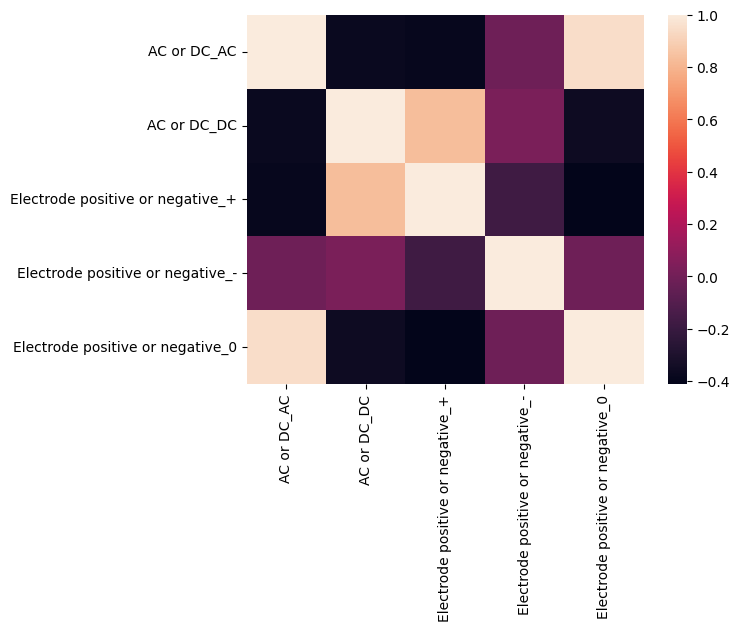

In [32]:
import seaborn as sns
corr = df2.corr()
sns.heatmap(corr)

La heatmap montre les relations linéaires entre les variables binaires créées par le one-hot encoding.

On observe une forte corrélation négative (teintes sombres) entre certaines modalités comme AC or DC_AC et AC or DC_DC, ce qui est logique, car ces variables sont mutuellement exclusives : si une soudure est en AC, elle ne peut pas être en DC.

Les colonnes liées à l’électrode positive ou négative (+, -, 0) présentent également une corrélation modérée entre elles, traduisant la même exclusivité entre ces trois catégories.

Les zones plus claires (autour de la diagonale) indiquent des corrélations positives fortes entre une variable et elle-même (valeur = 1).

Puisque les colonnes 'AC or DC' et 'Electrode positive or negative' sont très corrélées , on va essayer de voir la colonne moins utile càd qui a plus de NAN

In [33]:
# --- Compter le nombre de valeurs manquantes pour chaque colonne ---
missing_values = df.isna().sum()

# --- Afficher le résultat trié par ordre décroissant ---
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)


50 \% FATT                                               1621
Tungsten concentration (weight \%)                       1577
Ferrite with carbide aggreagate (\%)                     1563
Martensite (\%)                                          1563
Acicular ferrite (\%)                                    1562
Ferrite with second phase (\%)                           1562
Primary ferrite in microstructure (\%)                   1554
Hardness (kg mm$^{-2}$)                                  1530
Cobalt concentration (weight \%)                         1523
Arsenic concentration (parts per million by weight)      1418
Antimony concentration (parts per million by weight)     1392
Tin concentration (parts per million by weight)          1356
Boron concentration (parts per million by weight)        1148
Copper concentration (weight \%)                         1074
Nickel concentration (weight \%)                          955
Elongation (\%)                                           952
Reductio

Ici on remarque que la colonne AC or DC contient plus de valeurs manquantes (215) par rapport à Electrode positive or negative (156)

In [34]:
df.drop(columns=['AC or DC'], inplace=True)

In [35]:
df = pd.get_dummies(df, columns=['Electrode positive or negative'])

In [36]:
# see all the unique values in the 'Type of weld' column
df['Weld ID'].unique()

array(['Evans-Ni/CMn-1990/1991-0Aaw', 'Evans-Ni/CMn-1990/1991-0Aawch',
       'Evans-Ni/CMn-1990/1991-0Aht', ..., 'Birmingham-MAX37',
       'Birmingham-MAX38', 'Birmingham-MAX39'], dtype=object)

In [37]:
df.head()

,Carbon concentration (weight \%),Silicon concentration (weight \%),Manganese concentration (weight \%),Sulphur concentration (weight \%),Phosphorus concentration (weight \%),Nickel concentration (weight \%),Chromium concentration (weight \%),Molybdenum concentration (weight \%),Vanadium concentration (weight \%),Copper concentration (weight \%),...,50 \% FATT,Primary ferrite in microstructure (\%),Ferrite with second phase (\%),Acicular ferrite (\%),Martensite (\%),Ferrite with carbide aggreagate (\%),Weld ID,Electrode positive or negative_+,Electrode positive or negative_-,Electrode positive or negative_0
0,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aaw,True,False,False
1,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aawch,True,False,False
2,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aht,True,False,False
3,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Baw,True,False,False
4,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,NaN,32.0,28.0,40.0,0.0,0.0,Evans-Ni/CMn-1990/1991-0Bawch,True,False,False


In [38]:
# --- 1️⃣ Nettoyer les noms de colonnes pour éviter les erreurs dues aux espaces ---
df.columns = df.columns.str.strip()

# --- 2️⃣ Appliquer le One-Hot Encoding sur la colonne "Weld ID" ---
df_encoded = pd.get_dummies(df, columns=['Weld ID'] , dtype=int)

# --- 3️⃣ Afficher les nouvelles colonnes créées par l'encodage ---
print("✅ Nouvelles colonnes créées après encodage :")
print([col for col in df_encoded.columns if 'Weld ID_' in col])

# --- 4️⃣ Visualiser les 10 premières lignes des colonnes encodées ---
encoded_cols = [col for col in df_encoded.columns if 'Weld ID_' in col]

df_encoded[encoded_cols].head(10)

✅ Nouvelles colonnes créées après encodage :
['Weld ID_Alekseev&-CMnNi-1991-CH1', 'Weld ID_Alekseev&-CMnNi-1991-CH2', 'Weld ID_Alekseev&-CMnNi-1991-CH3', 'Weld ID_Alekseev&-CMnNi-1991-CH4', 'Weld ID_Alekseev&-CMnNi-1991-CH5', 'Weld ID_Alekseev&-CMnNi-1991-CH6', 'Weld ID_Alekseev&-CMnNi-1991-CH7', 'Weld ID_Birmingham-MAX31', 'Weld ID_Birmingham-MAX32', 'Weld ID_Birmingham-MAX33', 'Weld ID_Birmingham-MAX34', 'Weld ID_Birmingham-MAX35', 'Weld ID_Birmingham-MAX36', 'Weld ID_Birmingham-MAX37', 'Weld ID_Birmingham-MAX38', 'Weld ID_Birmingham-MAX39', 'Weld ID_Blond&-1984-10CD9.10a', 'Weld ID_Blond&-1984-10CD9.10b', 'Weld ID_Blond&-1984-10CD9.10c', 'Weld ID_Blond&-1984-10CD9.10d', 'Weld ID_Blond&-1984-10CD9.10e', 'Weld ID_Blond&-1984-10CD9.10f', 'Weld ID_Blond&-1984-14MNDV5a', 'Weld ID_Blond&-1984-14MNDV5b', 'Weld ID_Blond&-1984-14MNDV5c', 'Weld ID_Blond&-1984-14MNDV5d', 'Weld ID_Blond&-1984-14MNDV5e', 'Weld ID_Blond&-1984-14MNDV5f', 'Weld ID_Blond&-1984-A530a', 'Weld ID_Blond&-1984-A530b', 'W

,Weld ID_Alekseev&-CMnNi-1991-CH1,Weld ID_Alekseev&-CMnNi-1991-CH2,Weld ID_Alekseev&-CMnNi-1991-CH3,Weld ID_Alekseev&-CMnNi-1991-CH4,Weld ID_Alekseev&-CMnNi-1991-CH5,Weld ID_Alekseev&-CMnNi-1991-CH6,Weld ID_Alekseev&-CMnNi-1991-CH7,Weld ID_Birmingham-MAX31,Weld ID_Birmingham-MAX32,Weld ID_Birmingham-MAX33,...,Weld ID_p28-RR82011,Weld ID_p29-RR82011,Weld ID_p30-RR82011,Weld ID_p31-RR82011,Weld ID_p32-RR82011,Weld ID_p33-RR82011,Weld ID_p34-RR82011,Weld ID_p35-RR82011,Weld ID_p36-RR82011,Weld ID_p9-RR82011
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df.head()

,Carbon concentration (weight \%),Silicon concentration (weight \%),Manganese concentration (weight \%),Sulphur concentration (weight \%),Phosphorus concentration (weight \%),Nickel concentration (weight \%),Chromium concentration (weight \%),Molybdenum concentration (weight \%),Vanadium concentration (weight \%),Copper concentration (weight \%),...,50 \% FATT,Primary ferrite in microstructure (\%),Ferrite with second phase (\%),Acicular ferrite (\%),Martensite (\%),Ferrite with carbide aggreagate (\%),Weld ID,Electrode positive or negative_+,Electrode positive or negative_-,Electrode positive or negative_0
0,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aaw,True,False,False
1,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aawch,True,False,False
2,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aht,True,False,False
3,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Baw,True,False,False
4,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,NaN,32.0,28.0,40.0,0.0,0.0,Evans-Ni/CMn-1990/1991-0Bawch,True,False,False


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 45 columns):
 #   Column                                                                                                                                                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                           --------------  -----  
 0   Carbon concentration (weight \%)                                                                                                                                                                                                                                                 1652 non-nu

In [41]:
df['Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc.'].unique()

array(['MMA', 'ShMA', 'FCA', 'SA', 'TSA', 'SAA', 'GTAA', 'GMAA', 'NGSAW',
       'NGGMA'], dtype=object)

In [42]:
df = pd.get_dummies(df, columns=['Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc.'])

In [43]:
df.head()

,Carbon concentration (weight \%),Silicon concentration (weight \%),Manganese concentration (weight \%),Sulphur concentration (weight \%),Phosphorus concentration (weight \%),Nickel concentration (weight \%),Chromium concentration (weight \%),Molybdenum concentration (weight \%),Vanadium concentration (weight \%),Copper concentration (weight \%),...,"Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._FCA","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._GMAA","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._GTAA","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._MMA","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._NGGMA","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._NGSAW","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._SA","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._SAA","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._ShMA","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._TSA"
0,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,False,False
1,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,False,False
2,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,False,False
3,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,False,False
4,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,False,False


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 54 columns):
 #   Column                                                                                                                                                                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                 --------------  -----  
 0   Carbon concentration (weight \%)                                                                                                                                                                                                                                                

**Traitement des valeurs manquantes**

Dans le domaine de la soudure et de la science des matériaux, la gestion des valeurs manquantes dépend souvent de la nature des éléments chimiques mesurés. En effet, certains éléments comme le phosphore (P) et le soufre (S) jouent un rôle important dans les propriétés mécaniques et la qualité des soudures. Ainsi, lorsqu’ils sont absents des données, leurs valeurs manquantes sont remplacées par la moyenne calculée sur l’ensemble du jeu de données, afin de conserver une cohérence statistique sans introduire de biais majeur.
En revanche, pour d’autres éléments tels que le manganèse (Mn), le nickel (Ni) ou d’autres métaux traces, leurs absences sont souvent dues à des concentrations très faibles, proches des limites de détection des instruments d’analyse. Dans ce cas, il est courant de remplacer les valeurs manquantes par 0, car ces éléments ne sont pas ajoutés intentionnellement et leur influence est négligeable sur le processus de soudure.

Dans cette étape, nous allons gérer les valeurs manquantes des éléments chimiques selon les pratiques courantes en science des matériaux :

Les éléments Phosphore (P) et Soufre (S) verront leurs valeurs manquantes remplacées par la moyenne du jeu de données.

Les autres éléments chimiques (ex. Manganèse (Mn), Nickel (Ni), etc.) auront leurs valeurs manquantes remplacées par 0, car ces éléments ne sont généralement pas ajoutés intentionnellement et leurs concentrations sont souvent proches de la limite de détection.

In [47]:
# --- 🧩 1️⃣ Remplir les valeurs manquantes de P et S par la moyenne ---
df['Phosphorus concentration (weight \\%)'] = df['Phosphorus concentration (weight \\%)'].fillna(
    df['Phosphorus concentration (weight \\%)'].mean()
)
df['Sulphur concentration (weight \\%)'] = df['Sulphur concentration (weight \\%)'].fillna(
    df['Sulphur concentration (weight \\%)'].mean()
)

# --- 🧩 2️⃣ Remplacer les valeurs manquantes des autres éléments chimiques par 0 ---
elements_to_zero = [
    'Carbon concentration (weight \\%)',
    'Silicon concentration (weight \\%)',
    'Manganese concentration (weight \\%)',
    'Nickel concentration (weight \\%)',
    'Chromium concentration (weight \\%)',
    'Molybdenum concentration (weight \\%)',
    'Vanadium concentration (weight \\%)',
    'Copper concentration (weight \\%)',
    'Cobalt concentration (weight \\%)',
    'Tungsten concentration (weight \\%)',
    'Oxygen concentration (parts per million by weight)',
    'Titanium concentration (parts per million by weight)',
    'Nitrogen concentration (parts per million by weight)',
    'Aluminium concentration (parts per million by weight)',
    'Boron concentration (parts per million by weight)',
    'Niobium concentration (parts per million by weight)',
    'Tin concentration (parts per million by weight)',
    'Arsenic concentration (parts per million by weight)',
    'Antimony concentration (parts per million by weight)'
]

# Remplacer les valeurs manquantes de ces colonnes par 0
df[elements_to_zero] = df[elements_to_zero].fillna(0)

print("✅ Valeurs manquantes traitées avec succès !")


✅ Valeurs manquantes traitées avec succès !


**Création d’une colonne de puissance**

Dans cette étape, nous remplaçons les colonnes Voltage (V) et Current (A) par une nouvelle colonne unique représentant la Power (W).
Cette transformation repose sur la relation physique fondamentale entre la tension, le courant et la puissance, donnée par la formule :

P=U×I


où
U est la tension et
I le courant.
La puissance exprime donc l’énergie électrique transférée par unité de temps et constitue une mesure plus représentative du comportement électrique global d’un système que ses composantes séparées.
Ainsi, l’ajout d’une colonne “Power” permet de capturer l’interaction entre la tension et le courant, tout en réduisant la redondance des données et en simplifiant l’analyse sans perte d’information.

In [49]:
df['Puissance (W)']=df['Voltage (V)']*df['Current (A)']
df['Puissance (W)']

,Puissance (W)
0,3570.0
1,3570.0
2,3570.0
3,3570.0
4,3570.0
...,...
1647,13500.0
1648,13500.0
1649,13500.0
1650,13500.0


In [50]:
df.drop(['Current (A)', 'Voltage (V)', 'Weld ID'], axis=1, inplace=True)

In [51]:
bool_columns = df.select_dtypes(include='bool').columns

In [52]:
# Convert all boolean columns to integers (0 for False, 1 for True)
df[bool_columns] = df[bool_columns].astype(int)
df

,Carbon concentration (weight \%),Silicon concentration (weight \%),Manganese concentration (weight \%),Sulphur concentration (weight \%),Phosphorus concentration (weight \%),Nickel concentration (weight \%),Chromium concentration (weight \%),Molybdenum concentration (weight \%),Vanadium concentration (weight \%),Copper concentration (weight \%),...,"Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._GMAA","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._GTAA","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._MMA","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._NGGMA","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._NGSAW","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._SA","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._SAA","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._ShMA","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._TSA",Puissance (W)
0,0.037,0.30,0.65,0.008,0.012,0.00,0.0,0.00,0.00,0.0,...,0,0,1,0,0,0,0,0,0,3570.0
1,0.037,0.30,0.65,0.008,0.012,0.00,0.0,0.00,0.00,0.0,...,0,0,1,0,0,0,0,0,0,3570.0
2,0.037,0.30,0.65,0.008,0.012,0.00,0.0,0.00,0.00,0.0,...,0,0,1,0,0,0,0,0,0,3570.0
3,0.037,0.31,1.03,0.007,0.014,0.00,0.0,0.00,0.00,0.0,...,0,0,1,0,0,0,0,0,0,3570.0
4,0.037,0.31,1.03,0.007,0.014,0.00,0.0,0.00,0.00,0.0,...,0,0,1,0,0,0,0,0,0,3570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,0.100,0.35,0.90,0.008,0.016,0.60,8.6,0.98,0.18,0.0,...,0,0,0,0,0,1,0,0,0,13500.0
1648,0.088,0.36,0.88,0.008,0.017,0.57,8.4,0.94,0.19,0.0,...,0,0,0,0,0,1,0,0,0,13500.0
1649,0.090,0.34,0.89,0.008,0.016,0.17,8.2,0.94,0.02,0.0,...,0,0,0,0,0,1,0,0,0,13500.0
1650,0.092,0.35,0.90,0.008,0.016,0.54,8.4,0.97,0.17,0.0,...,0,0,0,0,0,1,0,0,0,13500.0


In [53]:
df.to_csv('welddb_cleaned', index=False)